# Training Transformer (GPT-micro) on L2AC task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
from mingpt.utils import set_seed
from mingpt.model import GPT
from mingpt.trainer import Trainer_with_test
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#set_seed(3407)

# code based on minGPT by Andrej Karpathy @ https://github.com/karpathy/minGPT

## Create training data sequence

rep 0
1000 sequences each with length 100
number of parameters: 3.19M
running on device cpu
iter_dt 0.00ms; iter 0: train loss 6.58074
iteration 20 calculate test accuracy
look back 4
reward error 100 reward count 100


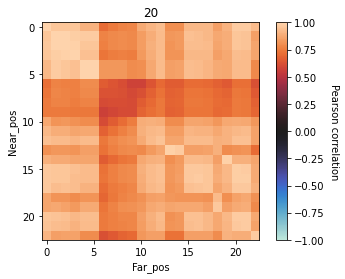

iteration 40 calculate test accuracy
look back 4
reward error 100 reward count 100


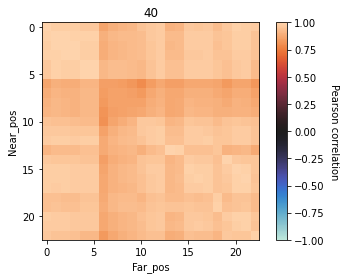

iteration 60 calculate test accuracy
look back 4
reward error 100 reward count 100


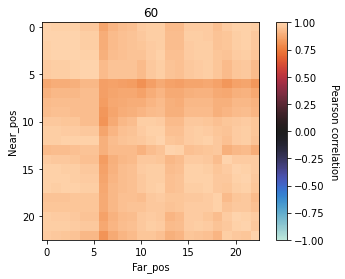

iteration 80 calculate test accuracy
look back 4
reward error 100 reward count 100


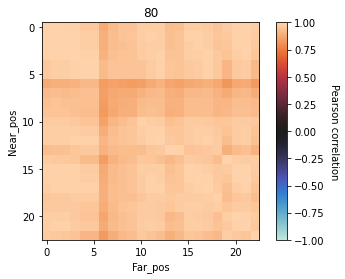

iteration 100 calculate test accuracy
look back 4
reward error 100 reward count 100


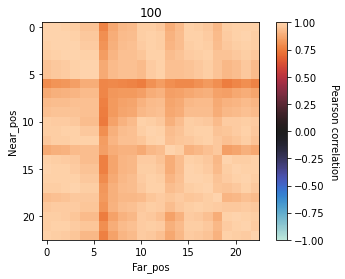

iter_dt 146.33ms; iter 100: train loss 2.25426
iteration 120 calculate test accuracy
look back 4
reward error 100 reward count 100


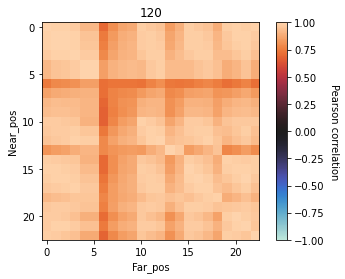

iteration 140 calculate test accuracy
look back 4
reward error 100 reward count 100


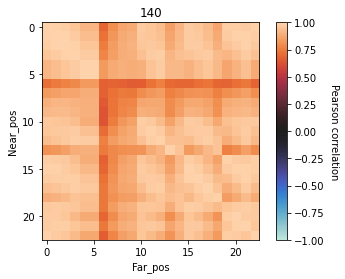

iteration 160 calculate test accuracy
look back 4
reward error 100 reward count 100


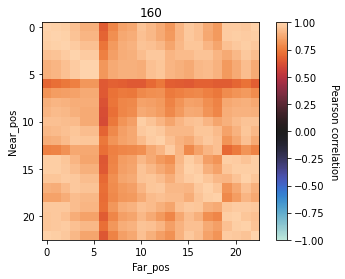

iteration 180 calculate test accuracy
look back 4
reward error 100 reward count 100


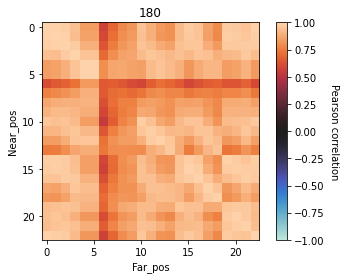

iteration 200 calculate test accuracy
look back 4
reward error 100 reward count 100


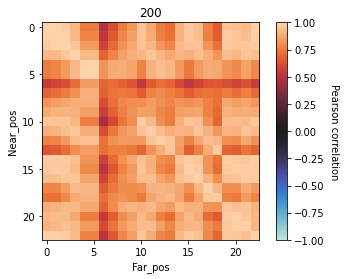

iter_dt 143.62ms; iter 200: train loss 1.34987
iteration 220 calculate test accuracy
look back 4
reward error 55 reward count 100


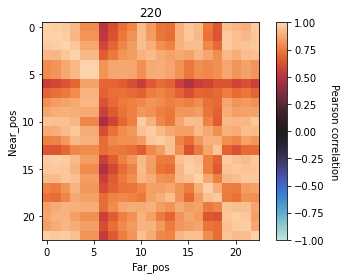

iteration 240 calculate test accuracy
look back 4
reward error 0 reward count 100


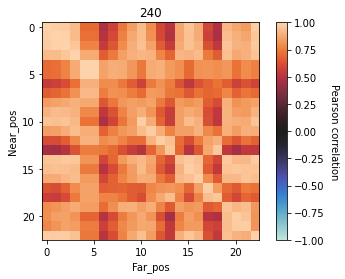

iteration 260 calculate test accuracy
look back 4
reward error 100 reward count 100


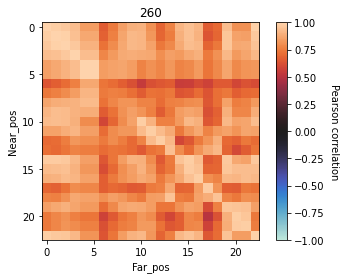

iteration 280 calculate test accuracy
look back 4
reward error 45 reward count 100


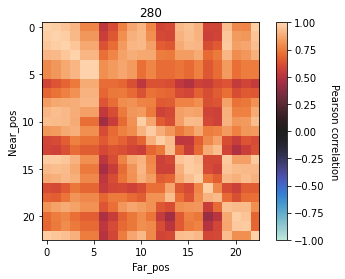

iteration 300 calculate test accuracy
look back 4
reward error 0 reward count 100


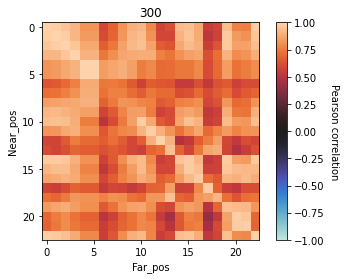

iter_dt 143.39ms; iter 300: train loss 0.72864
iteration 320 calculate test accuracy
look back 4
reward error 0 reward count 100


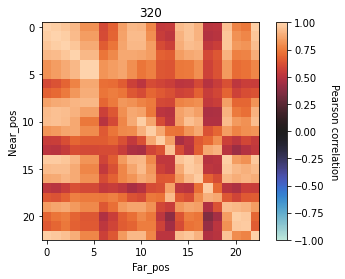

iteration 340 calculate test accuracy
look back 4
reward error 45 reward count 100


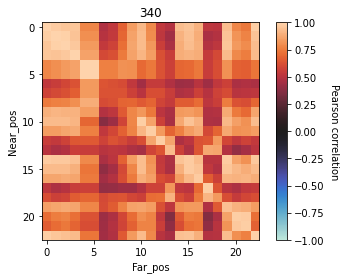

iteration 360 calculate test accuracy
look back 4
reward error 0 reward count 100


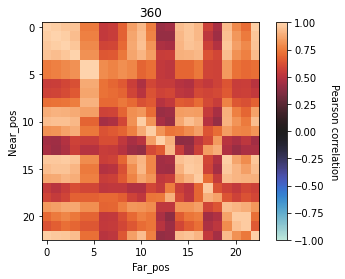

iteration 380 calculate test accuracy
look back 4
reward error 0 reward count 100


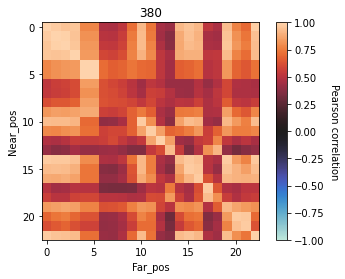

iteration 400 calculate test accuracy
look back 4
reward error 0 reward count 100


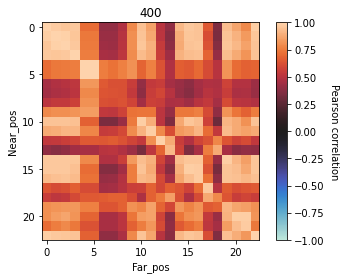

iter_dt 142.30ms; iter 400: train loss 0.38419
iteration 420 calculate test accuracy
look back 4
reward error 0 reward count 100


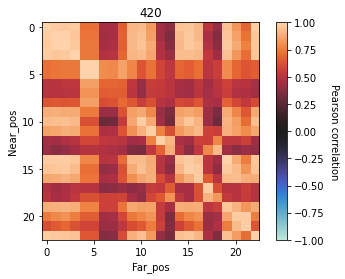

iteration 440 calculate test accuracy
look back 4
reward error 0 reward count 100


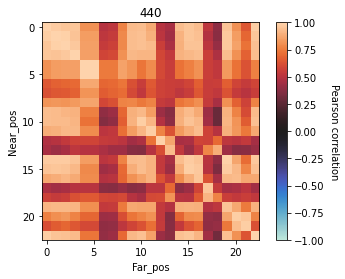

iteration 460 calculate test accuracy
look back 4
reward error 0 reward count 100


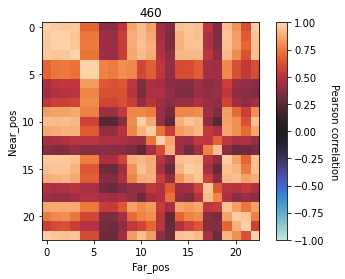

iteration 480 calculate test accuracy
look back 4
reward error 0 reward count 100


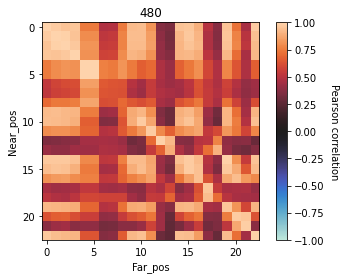

iteration 500 calculate test accuracy
look back 4
reward error 0 reward count 100


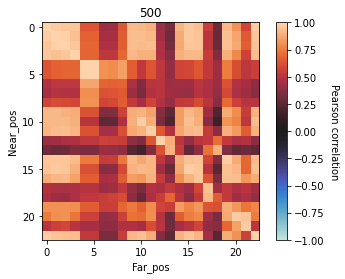

iter_dt 159.36ms; iter 500: train loss 0.21798
iteration 520 calculate test accuracy
look back 4
reward error 0 reward count 100


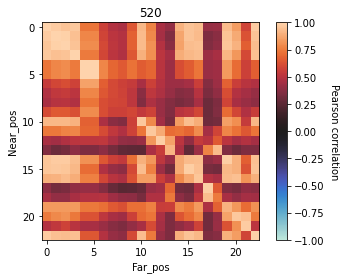

iteration 540 calculate test accuracy
look back 4
reward error 0 reward count 100


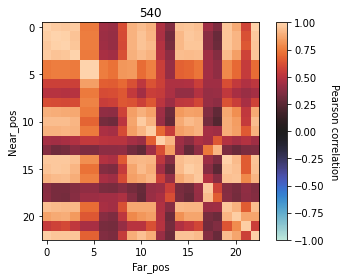

iteration 560 calculate test accuracy
look back 4
reward error 0 reward count 100


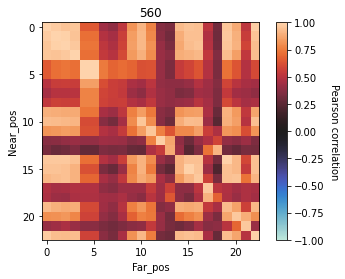

iteration 580 calculate test accuracy
look back 4
reward error 0 reward count 100


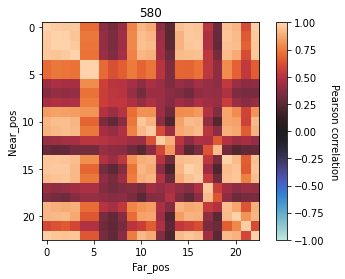

iteration 600 calculate test accuracy
look back 4
reward error 0 reward count 100


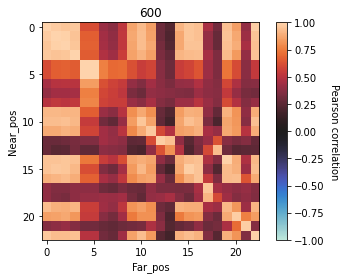

iter_dt 146.46ms; iter 600: train loss 0.12303
iteration 620 calculate test accuracy
look back 4
reward error 0 reward count 100


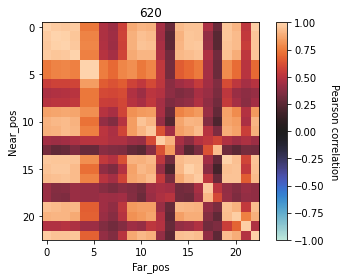

iteration 640 calculate test accuracy
look back 4
reward error 0 reward count 100


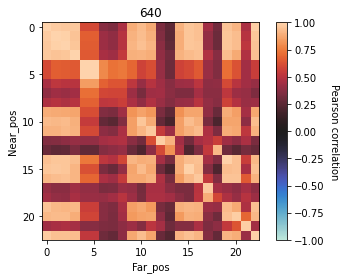

iteration 660 calculate test accuracy
look back 4
reward error 0 reward count 100


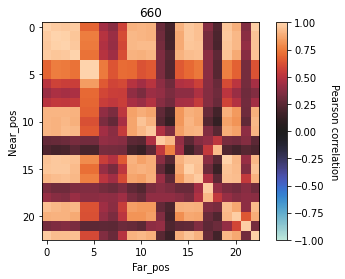

iteration 680 calculate test accuracy
look back 4
reward error 0 reward count 100


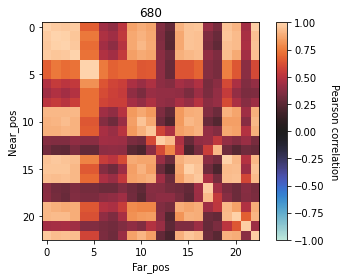

iteration 700 calculate test accuracy
look back 4
reward error 0 reward count 100


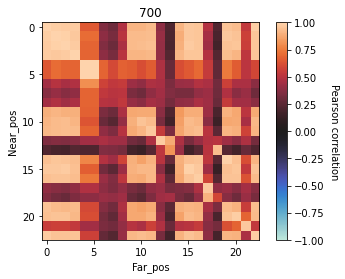

iter_dt 147.04ms; iter 700: train loss 0.08331
iteration 720 calculate test accuracy
look back 4
reward error 0 reward count 100


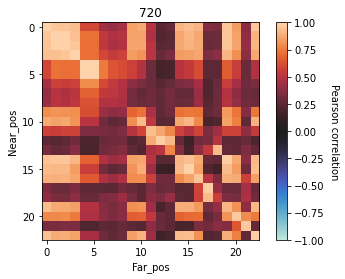

iteration 740 calculate test accuracy
look back 4
reward error 0 reward count 100


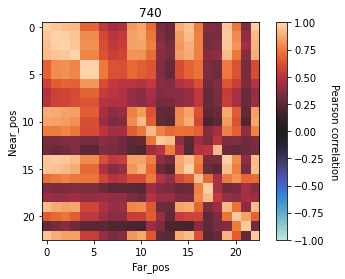

iteration 760 calculate test accuracy
look back 4
reward error 0 reward count 100


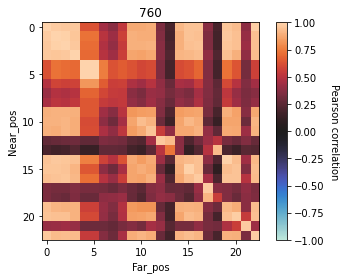

iteration 780 calculate test accuracy
look back 4
reward error 0 reward count 100


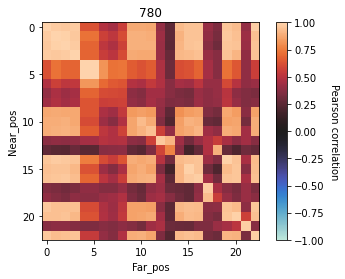

iteration 800 calculate test accuracy
look back 4
reward error 0 reward count 100


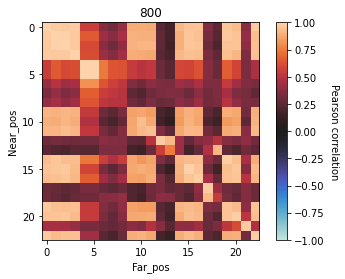

iter_dt 139.18ms; iter 800: train loss 0.07587
iteration 820 calculate test accuracy
look back 4
reward error 0 reward count 100


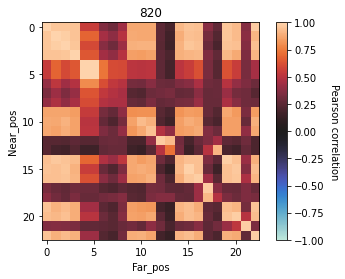

iteration 840 calculate test accuracy
look back 4
reward error 0 reward count 100


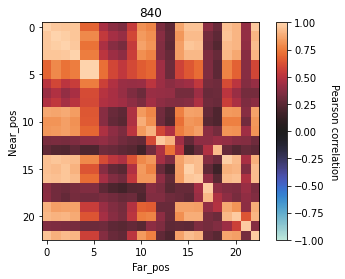

iteration 860 calculate test accuracy
look back 4
reward error 0 reward count 100


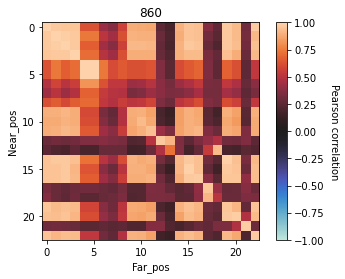

iteration 880 calculate test accuracy
look back 4
reward error 0 reward count 100


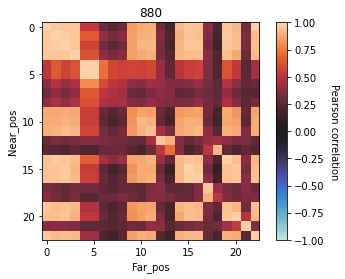

iteration 900 calculate test accuracy
look back 4
reward error 0 reward count 100


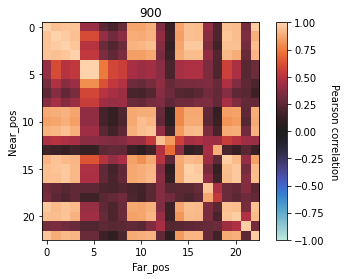

iter_dt 142.26ms; iter 900: train loss 0.05758
iteration 920 calculate test accuracy
look back 4
reward error 0 reward count 100


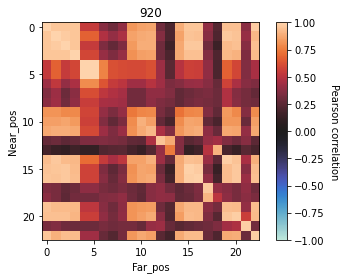

iteration 940 calculate test accuracy
look back 4
reward error 0 reward count 100


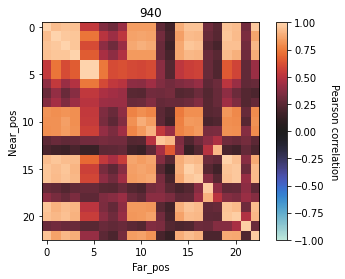

iteration 960 calculate test accuracy
look back 4
reward error 0 reward count 100


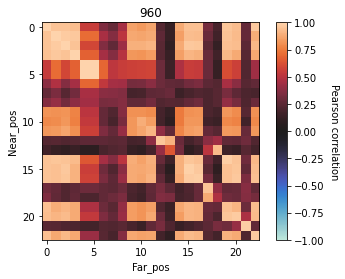

iteration 980 calculate test accuracy
look back 4
reward error 0 reward count 100


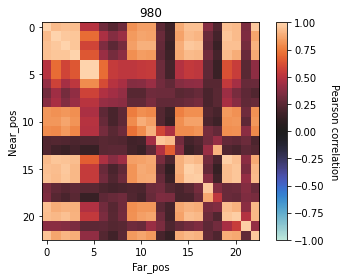

iteration 1000 calculate test accuracy
look back 4
reward error 0 reward count 100


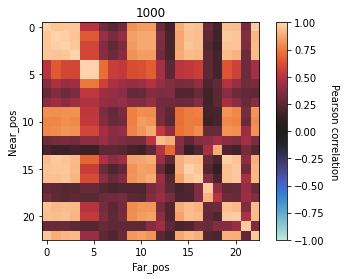

iter_dt 149.69ms; iter 1000: train loss 0.05843
iteration 1020 calculate test accuracy
look back 4
reward error 0 reward count 100


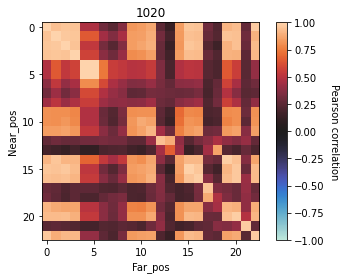

iteration 1040 calculate test accuracy
look back 4
reward error 0 reward count 100


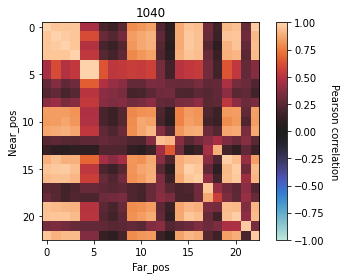

iteration 1060 calculate test accuracy
look back 4
reward error 0 reward count 100


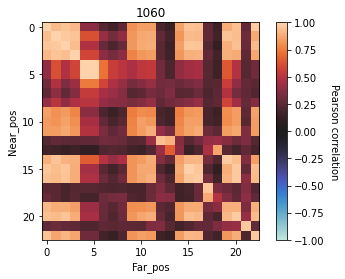

iteration 1080 calculate test accuracy
look back 4
reward error 0 reward count 100


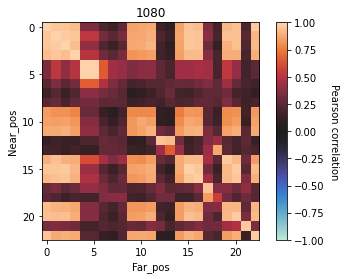

iteration 1100 calculate test accuracy
look back 4
reward error 0 reward count 100


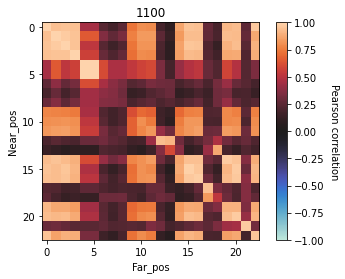

iter_dt 137.05ms; iter 1100: train loss 0.05312
iteration 1120 calculate test accuracy
look back 4
reward error 0 reward count 100


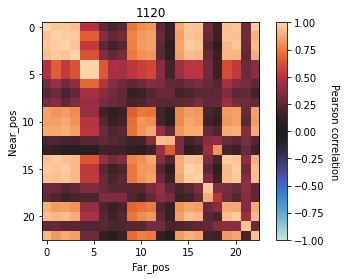

iteration 1140 calculate test accuracy
look back 4
reward error 0 reward count 100


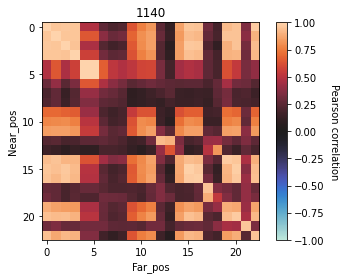

iteration 1160 calculate test accuracy
look back 4
reward error 0 reward count 100


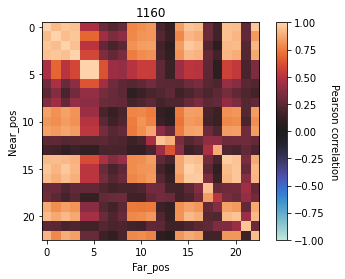

iteration 1180 calculate test accuracy
look back 4
reward error 0 reward count 100


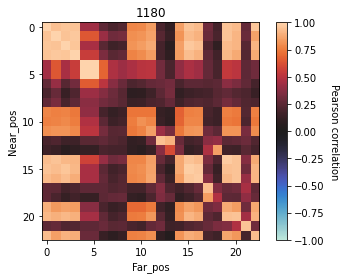

iteration 1200 calculate test accuracy
look back 4
reward error 0 reward count 100


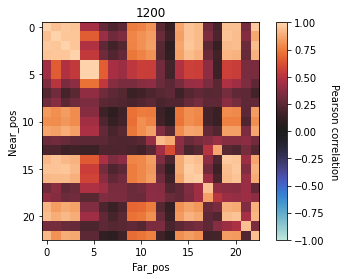

rep 1
1000 sequences each with length 100
number of parameters: 3.19M
running on device cpu
iter_dt 0.00ms; iter 0: train loss 6.51617
iteration 20 calculate test accuracy
look back 4


KeyboardInterrupt: 

In [2]:
N = 1000 # batch number
num_trials = 20 # sequence length is num_trials x trial length
trials = np.random.choice(2, num_trials)

near = np.array([1,1,1, 1,1,1, 2,2,2,2, 1,1,1, 4,6, 1,1,1, 5,5, 1,1,0])
far  = np.array([1,1,1, 1,1,1, 3,3,3,3, 1,1,1, 4,4, 1,1,1, 5,6, 1,1,0])

block_size = 100
tr_len = len(near)


corr_mat_big = []
loss_curve_big = []
test_accuracy_big = []

class IntegerDataset(torch.utils.data.Dataset):
        def __init__(self, data_file):
            # load your data file as a numpy array
            self.data = data_file
            # convert it to a torch tensor of type long
            self.data = torch.from_numpy(self.data).long()

        def __len__(self):
            # return the number of sequences in your dataset
            return len(self.data)

        def get_vocab_size(self):
            return len(np.unique(self.data))

        def __getitem__(self, idx):
            # return the sequence at index idx as a dictionary with keys x and y
            # x is the input sequence with all but the last element
            # y is the target sequence with all but the first element
            x = self.data[idx, :-1] 
            y = self.data[idx, 1:]
            return x, y

for rep in range(10):
    set_seed(rep)
    print(f'rep {rep}')
    
    final_x = np.zeros((N, block_size), dtype=np.int64)

    for i in range(N):
        seqs = np.zeros(num_trials*tr_len, dtype=np.int64)

        for trial in range(len(trials)):
            if trials[trial] == 0:
                seqs[trial*tr_len: (trial+1)*tr_len] = near
            else:
                seqs[trial*tr_len: (trial+1)*tr_len] = far
        ## random sample block_size chunks, stack these chunks into training batches
        random_start = np.random.randint(0, tr_len*num_trials-block_size+1)
        new_seq = seqs[random_start:random_start+block_size]
        final_x[i,:] = new_seq
        
        
    OBS = len(np.unique(final_x))

    print(f'{final_x.shape[0]} sequences each with length {final_x.shape[1]}')
    

    dataset = IntegerDataset(final_x)

    model_config = GPT.get_default_config()
    # model_config.model_type = 'gpt-minimum'
    # model_config.model_type = 'gpt-nano' ## there are different models to choose from. e.g., 'gpt-micro' & 'gpt-mini'
    model_config.model_type = 'gpt-micro'
    
    # no dropout
    model_config.embd_pdrop = 0
    model_config.resid_pdrop = 0
    model_config.attn_pdrop = 0
    
    model_config.vocab_size = dataset.get_vocab_size()
    model_config.block_size = block_size
    model = GPT(model_config)
    vars(model_config)


    test_trial_N = 100
    test_trials = np.random.choice(2, test_trial_N)

    test_x = np.zeros((test_trial_N*tr_len), dtype=np.int64)

    for i in range(test_trial_N):

        for trial in range(len(test_trials)):
            if test_trials[trial] == 0:
                test_x[trial*tr_len: (trial+1)*tr_len] = near
            else:
                test_x[trial*tr_len: (trial+1)*tr_len] = far

    test_data = torch.tensor(test_x).to(torch.long)

    # create a Trainer object

    train_config = Trainer_with_test.get_default_config()
    train_config.learning_rate = 1e-4
    train_config.max_iters = 1200
    train_config.num_workers = 0
    train_config.batch_size = 32
    train_config.pos_loss_beta = 1
    train_config.weight_decay = 0
    ##Weight_decay used 0.01
    #trainer = Trainer(train_config, model, dataset)

    trainer = Trainer_with_test(train_config, model, dataset, test_data, test_trials)

    vars(train_config)

    error_min = 1/46

    corr_mat = []
    def batch_end_callback(trainer):
        if trainer.iter_num % 100 == 0:
            #corr_mat.append(trainer.plot_mat())
            print(f"iter_dt {trainer.iter_dt * 1000:.2f}ms; iter {trainer.iter_num}: train loss {trainer.loss.item():.5f}")
    trainer.set_callback('on_batch_end', batch_end_callback)

    loss_curve, test_accuracy, iter_num_plot,corr_matrix_big = trainer.run()
    
    corr_mat_big.append(np.array(corr_mat))
    loss_curve_big.append(loss_curve)
    test_accuracy_big.append(test_accuracy)
    
    del model 
    del trainer

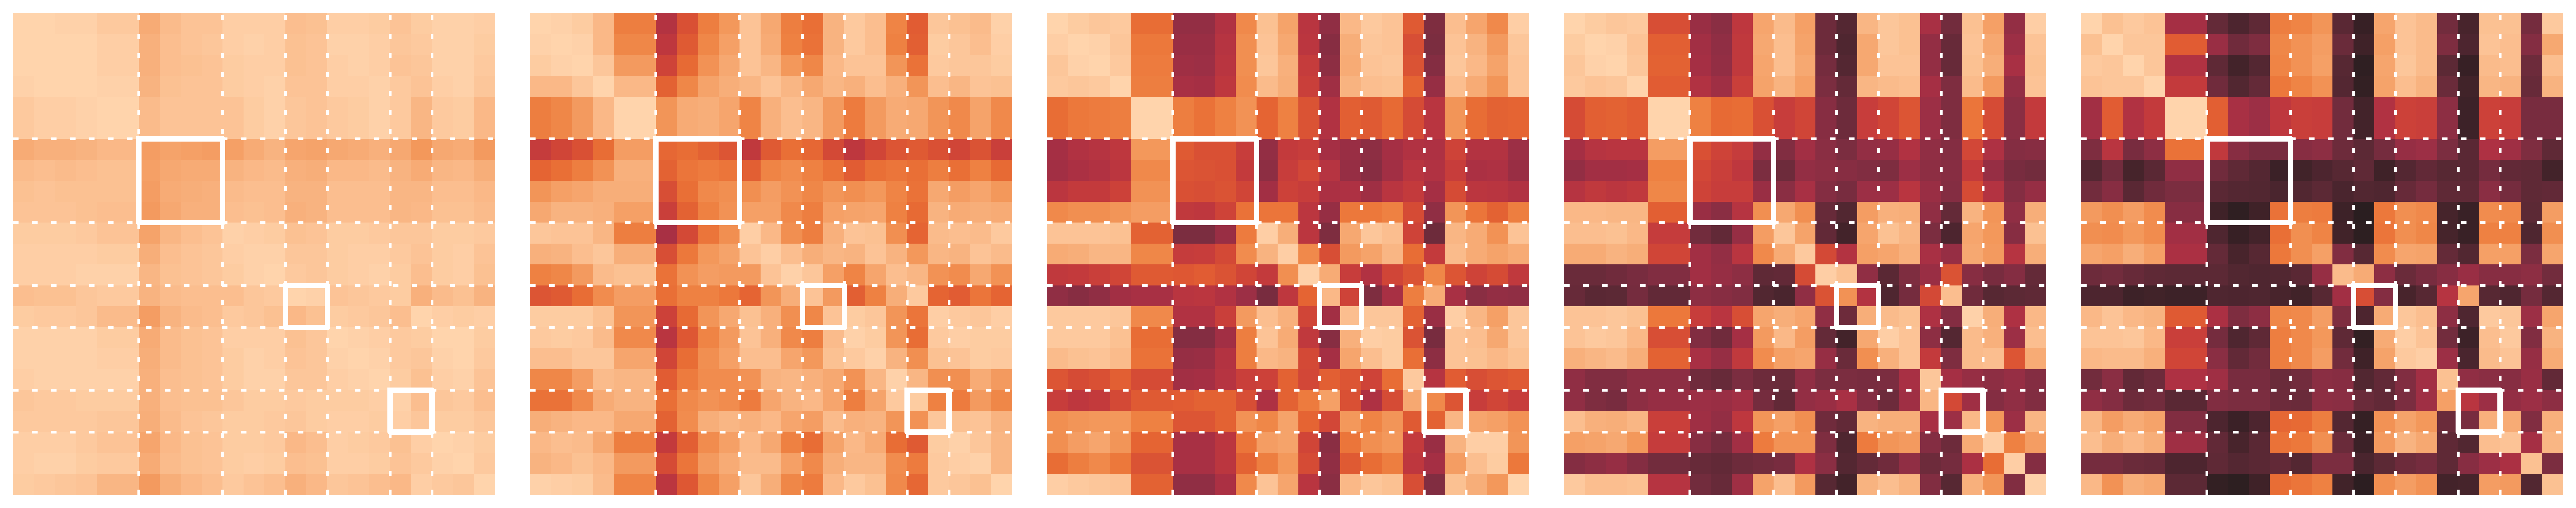

In [3]:
import datetime

epochs = [4, 10, 20, 30, 60]

# create subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4), dpi=600)

for i, epoch in enumerate(epochs):
    sns.heatmap(corr_matrix_big [epoch-1], cmap='icefire', vmin=-1, vmax=1, ax=axs[i], 
                cbar=False, xticklabels=False, yticklabels=False, linewidths=0)
    axs[i].set_aspect('equal')  # make each subplot square

    # Loop for dotted lines
    for lines in [6, 10, 13, 15, 18, 20]:  
        axs[i].axvline(lines, linestyle=(0, (2, 5)), color='white', linewidth=1.5)  # dotted vertical lines
        axs[i].axhline(lines, linestyle=(0, (2, 5)), color='white', linewidth=1.5)  # dotted horizontal lines

    # Draw square bounding box
    for (low, high) in [(6, 10), (13, 15), (18, 20)]:
        axs[i].plot([low, high, high, low, low], [low, low, high, high, low], color='white',linewidth=3)  

plt.tight_layout()
today = datetime.datetime.now().strftime('%Y_%m_%d')  # get today's date
plt.savefig(f'GPT_corr_plot_{today}.pdf', format='pdf', dpi=600)

plt.show()